# Stanford CME 241 (Winter 2025) - Assignment 1

**Due: Sunday, January 19 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):* 
- Person 1: Justin Li
- Person 2
- Person 3

## Imports

In [69]:
from rl.markov_process import FiniteMarkovProcess
from rl.markov_process import Terminal
from rl.markov_process import NonTerminal
from rl.distribution import Categorical
from rl.distribution import Constant
from collections import Counter
import random
random.seed(3)

## Question 1: Snakes and Ladders (Led by Justin)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image below for the locations of the snakes and ladders.

![Snakes and Laddders](snakesAndLadders.png)
---

### Part (A) Answer

We consider the $0$ as the starting point, at the left of the square 1. And 1,2,...,100 are the avaliable square, so the state space is $\{0,1,2,...,100\}$.


### Part (B) Answer

The transition probability to the square $s'$ from $s$ with $s\in \{0,1,2,...,93\}$

$$
p(s,s')=\frac{1}{6} \ \ \ \ \ \textbf{for $s'\in \{s+1, s+2,...,s+6\}$}
$$
For $s \in \{94, 95,...,99\}$:
$$
p(s,s')=
\begin{cases}
\frac{s-93}{6}&\text{if $s'=100$}\\
\frac{1}{6}&\text{if $s+1\leq s'\leq 99$}
\end{cases}
$$
and
$$
p(100,100)=1
$$
since $100$ is terminate state.

Now let $s_l$ be the squre represented by bottom of ladder and $t_l$ be the top of the ladder, then we have
$$
p(s_l,t_l)=1
$$
Similarly, let $s_s$ be the squre represented by snake head and $t_s$ be the snake tail, then we have
$$
p(s_s, t_s)=1
$$


### Part (C) Answer

In [54]:
# fill in with Python code
Snake_Ladder_Transition = {1:38, 4:14, 8:30, 28:76, 21:42, 50:67, 71: 92, 80: 99,
                          97: 78, 95:56, 88:24, 63: 18, 36: 6, 32: 10}
Avaliable_States_Transition = [[j for j in range(i + 1, i + 7)] for i in range(100)]

# Update Avaliable_States_Transition:
for i in range(100):
    for j in range(6):
        if Avaliable_States_Transition[i][j] in Snake_Ladder_Transition:
            Avaliable_States_Transition[i][j] = Snake_Ladder_Transition[Avaliable_States_Transition[i][j]]
        elif Avaliable_States_Transition[i][j] > 100:
            Avaliable_States_Transition[i][j] = 100

transition_map = {i: Categorical(Counter(Avaliable_States_Transition[i])) for i in range(100)}
transition_map[100] = Constant(Terminal(100))

In [55]:
Game = FiniteMarkovProcess(transition_map)
start_distribution = Constant(NonTerminal(0))
traces = Game.traces(start_distribution)

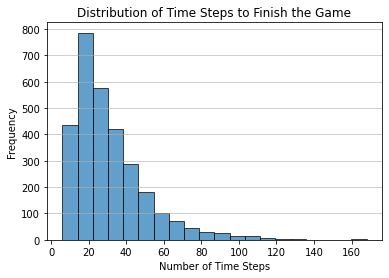

In [81]:
import matplotlib.pyplot as plt
import itertools

time_steps = [len(list(trace)) - 2 for trace in itertools.islice(traces, 3000)]
plt.hist(time_steps, bins=20, edgecolor="black", alpha=0.7)
plt.title("Distribution of Time Steps to Finish the Game")
plt.xlabel("Number of Time Steps")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

## Question 2: Markov Decision Processes (Led by Justin)

Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: 
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer

By the Bellman Optimality Equation we have
\begin{align}
V^*(s)&=\max_{a\in [0,1]} \mathcal{R}(s,a)+\gamma \cdot \sum_{s'\in \mathcal{N}} p(s,a,s') V^*(s')\\
&=\max_{a\in [0,1]} a\cdot(1-a)+(1-a)\cdot(1+a)+\frac{1}{2} [ a\cdot V^*(s+1)+(1-a)\cdot V^*(s)]\\
&=\max_{a\in [0,1]} a\cdot(1-a)+(1-a)\cdot(1+a)+\frac{1}{2}  V^*(s) \ \ \ \ \text{since transition probabilities only depends on $a$ not $s$, so $V^*(s+1)=V^*(s)$}\\
&=\frac{1}{2}  V^*(s) + \max_{a\in [0,1]} a\cdot(1-a)+(1-a)\cdot(1+a)
\end{align}

Rearrange the $V^*(s)$ term, gives us that
\begin{align}
V^*(s)= 2\cdot \max_{a\in [0,1]} (1 + a - 2a^2) = 2\cdot \frac{9}{8}=\frac{9}{4} \ \ \ \ \ \ \ \ \ \  \text{since $1 + a - 2a^2$ attain max value $\frac{9}{8}$ at $a=\frac{1}{4}$}
\end{align}

so the Optimal Value Function $V^*(s)=\frac{9}{4}$ for all $s$, and the optimal action $a^*=\frac{1}{4}$

### Part (B) Answer

By the theorem, we have $V^{\pi^*}(s)=V^*(s)$ for all $s\in \mathcal{N}$ for all optimal policies $\pi^*$. Since we know $V^*(s)=\frac{9}{4}$ for all $s$, and the optimal deterministic policy $\pi:\mathcal{N}\to \mathcal{A}=[0,1]$ maximize $V(s)$, then we have
$$
\pi^*(s)=\frac{1}{4}=a^*
$$
for all $s\in \mathcal{N}$

### Part (C) Answer

#### Bellman Optimality Equation Change:
The Bellman optimality equation becomes
\begin{align}
V^*(s)&=\max_{a\in [0,1/s]} \mathcal{R}(s,a)+\gamma \cdot \sum_{s'\in \mathcal{N}} p(s,a,s') V^*(s')\\
&=\max_{a\in [0,1/s]} a\cdot(1-a)+(1-a)\cdot(1+a)+\frac{1}{2} [ a\cdot V^*(s+1)+(1-a)\cdot V^*(s)]\\
&=\max_{a\in [0,1/s]} \left(-2a^2+ \left(1+\frac{V^*(s+1) - V^*(s)}{2}\right) a + 1+\frac{V^*(s)}{2}  \right)
\end{align}

#### Optimal Value Function Change:
Since the action spaces are more restricted, the optimal value function will be smaller for all state $s$.

#### Optimal Policy Change:
The rewards do not depend on states. Since larger state has more restricted action space, we always have $V^*(s+1) - V^*(s) \le 0$. Consequently, when $s \le 4$, the optimal policy is still $\pi^*(s) = 1/4$. 

For $s \ge 5$, note that we also have $2 \le V^*(s) \ge \frac{9}{4}$ where the lower bound is obtained by considering policy $\pi(s) = 0, \forall s$, and the upper bound is by part (a). So $$7/8 \le 1+\frac{V^*(s+1) - V^*(s)}{2} \le 1.$$. By Bellman equation, $a^*$ is on the boundary, which implies $\pi(s) = 1/s$.

So the optimal policy becomes
$$
\pi(s) = \frac{1}{\max(s,4)}.
$$

## Question 3: Frog in a Pond (Led by  Justin)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**. 

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)? 

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components: 

- **State Space**: Define the possible states of the MDP. 
- **Action Space**: Specify the actions available to the frog at each state. 
- **Transition Function**: Describe the probabilities of transitioning between states for each action. 
- **Reward Function**: Specify the reward associated with the states and transitions. 

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

After running the code, we observe the following graphs for $n=3$, $n=10$, and $n=25$:

![FrogGraphs](frogGraphs.png)

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  

There are $n+1$ lilypads labels from $0$ to $n$, so the state space will be
$$
\{0,1,...,n\}
$$

#### Action Space:  

The frog has different action croaking sound $A$ or $B$, so the action space will be

$$
\{A, B\}
$$

#### Transition Function:  

According the frog, we have

$$
P(S_{t+1}\mid S_t, A_t)=
\begin{cases}
\frac{i}{n}&\text{if $(S_{t+1}, S_t, A_t) = (i - 1, i, A)$}\\
\frac{n-i}{n}&\text{if $(S_{t+1}, S_t, A_t) = (i + 1, i, A)$}\\
\frac{1}{n}&\text{if $(S_t, A_t) = (i, B)$ and $S_{t+1}\in \{0,1,..,i-1,i+1,..,n\}$}\\
1&\text{if $(S_{t+1}, S_t) = (0, 0)$ and $A_t \in \{A,B\}$ (i.e. escape fail)}\\
1&\text{if $(S_{t+1}, S_t) = (n, n)$ and $A_t \in \{A,B\}$ (i.e. escape suceed)}\\
0&\text{otherwise}
\end{cases}
$$

#### Reward Function:  

Since the goal of forg is to escape, so when it reach to $n$ it can get reward, so the reward function will be
$$
R(s,a,s')=
\begin{cases}
1&\text{if $s'=n$}\\
0&\text{if $s'\neq n$}
\end{cases}
$$

### Part (B) Answer

In [5]:
MDPRefined = dict
def get_lily_pads_mdp(n: int) -> MDPRefined:
    data = {
        i: {
            'A': {
                i - 1: i / n, # TODO: fill in with the correct transition probabilities
                i + 1: (n-i)/n, # TODO: fill in with the correct transition probabilities
            },
            'B': {
                j: 1/n for j in range(n+1) if j != i # TODO: fill in with the correct transition probabilities
            }
        } for i in range(1, n)
    }
    data[0] = {"A": {0:1}, "B":{0:1}} # TODO: this is the initial state, so what would be the correct transition probabilities?
    data[n] = {"A": {n:1}, "B":{n:1}} # TODO: similarly, this is the terminal state, so what would be the correct transition probabilities?

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            act_val_fA = (i / n) * old_vf[i - 1] + ((n - i) / n) * old_vf[i + 1] 
            act_val_fB = (sum(old_vf) - old_vf[i] + 1) / n # sum all vf except at i, then add reward at n
            if i == (n - 1):
                act_val_fA += ((n - i) / n) # reward at n
            vf[i] = max(act_val_fA, act_val_fB) # TODO: fill in with the Bellman update
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer

For the Optimal Policy pattern, at lilypad greater than 1 the frog will croaks $\text{A}$ since it has higher optimal action values, if it's at lilypad n-1 the action value is the highest among other lilypad among all actions; at lilypad 1, the frog will croaks $\text{B}$ since in this case it has higher optimal action value. Therefore, according to this policy when the frog is on lilypad 13 it should croaks $\text{A}$, when it's at lilypad 1 it should croaks $\text{B}$

## Question 4: Manual Value Iteration (Led by ______)

Consider a simple MDP with $\mathcal{S} = \{s_1, s_2, s_3\}, \mathcal{T} = \{s_3\}, \mathcal{A} = \{a_1, a_2\}$. The State Transition Probability function  
$$\mathcal{P}: \mathcal{N} \times \mathcal{A} \times \mathcal{S} \rightarrow [0, 1]$$  
is defined as:  
$$\mathcal{P}(s_1, a_1, s_1) = 0.25, \mathcal{P}(s_1, a_1, s_2) = 0.65, \mathcal{P}(s_1, a_1, s_3) = 0.1$$  
$$\mathcal{P}(s_1, a_2, s_1) = 0.1, \mathcal{P}(s_1, a_2, s_2) = 0.4, \mathcal{P}(s_1, a_2, s_3) = 0.5$$  
$$\mathcal{P}(s_2, a_1, s_1) = 0.3, \mathcal{P}(s_2, a_1, s_2) = 0.15, \mathcal{P}(s_2, a_1, s_3) = 0.55$$  
$$\mathcal{P}(s_2, a_2, s_1) = 0.25, \mathcal{P}(s_2, a_2, s_2) = 0.55, \mathcal{P}(s_2, a_2, s_3) = 0.2$$  

The Reward Function  
$$\mathcal{R}: \mathcal{N} \times \mathcal{A} \rightarrow \mathbb{R}$$  
is defined as:  
$$\mathcal{R}(s_1, a_1) = 8.0, \mathcal{R}(s_1, a_2) = 10.0$$  
$$\mathcal{R}(s_2, a_1) = 1.0, \mathcal{R}(s_2, a_2) = -1.0$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer

Note that in iteration
$$
q_k(s,a)=R(s,a)+\gamma\sum_{s'\in S} P(s,a,s')\cdot v_{k-1}(s') \ \ \ \ \ \ \ \ \ \ \ \ \text{and} \ \ \ \ \ \ \ \ \ \ \ \ v_{k}(s)=\max_{a\in \mathcal{A}} q_k(s,a)
$$

Then for iteration $k=1$:
\begin{align}
&q_1(s_1,a_1)=8 + 0.25\cdot 10 + 0.65 \cdot 1 + 0.1 \cdot 0 = 11.15\\
&q_1(s_1,a_2)=10 + 0.1\cdot 10 + 0.4 \cdot 1 + 0.5 \cdot 0 = 11.4\\
&q_1(s_2,a_1)=1 + 0.3\cdot 10 + 0.15 \cdot 1 + 0.55 \cdot 0 = 4.15\\
&q_1(s_2,a_2)=-1 + 0.25\cdot 10 + 0.55 \cdot 1 + 0.2 \cdot 0 = 2.05\\
\end{align}

Since $s_3$ is terminate state, then
\begin{align}
& v_1(s_1)= \max \{q_1(s_1,a_1), q_1(s_1,a_2)\}=11.4 \\
& v_1(s_2)= \max \{q_1(s_2,a_1), q_1(s_2,a_2)\}=4.15\\
& v_1(s_3)=0
\end{align}

For iteration $k=2$:
\begin{align}
&q_2(s_1,a_1)=8 + 0.25\cdot 11.4 + 0.65 \cdot 4.15 + 0.1 \cdot 0 = 13.5475\\
&q_2(s_1,a_2)=10 + 0.1\cdot 11.4 + 0.4 \cdot 4.15 + 0.5 \cdot 0 = 12.8\\
&q_2(s_2,a_1)=1 + 0.3\cdot 11.4 + 0.15 \cdot 4.15 + 0.55 \cdot 0 = 5.0425\\
&q_2(s_2,a_2)=-1 + 0.25\cdot 11.4 + 0.55 \cdot 4.15 + 0.2 \cdot 0 = 4.1325\\
\end{align}

and 
\begin{align}
& v_2(s_1)= \max \{q_2(s_1,a_1), q_2(s_1,a_2)\}=13.5475 \\
& v_2(s_2)= \max \{q_2(s_2,a_1), q_2(s_2,a_2)\}=5.0425\\
& v_2(s_3)=0
\end{align}

Note that the policy will provide the action $a$ maximizes the $q_k(s,a)$, then we have the greddy policy
$$
\pi_1(s_1)=a_2 \ \ \ \ \pi_1(s_2)=a_1 \ \ \ \ \ \  \ \ \ \ \ \  \ \ \ \ \ \ \pi_2(s_1)=\pi_2(s_2)=a_1
$$

### Part (B) Answer:  

In the iteration:
$$
q_k(s,a)=R(s,a)+\sum_{s'\in S} P(s,a,s')\cdot v_{k-1}(s') \ \ \ \ \ \ \ \ \ \ \ \ \text{and} \ \ \ \ \ \ \ \ \ \ \ \ v_{k}(s)=\max_{a\in \mathcal{A}} q_k(s,a)
$$
and
$$
\pi_k(s)=arg\max_a q_k(s,a)
$$

Note that we are improving the $v_{k}$ by iteration, so $v_k$ is increasing, then we have the following 
$$
q_k(s_1,a_1) - q_k(s_1,a_2)=0.15 v_{k-1}(s_1) + 0.25 v_{k-1}(s_2) - 2 \geq 0.15 v_{2}(s_1) + 0.25 v_{2}(s_2) - 2 = 0.7475 > 0
$$

which implies $q_k(s_1,a_1) > q_k(s_1,a_2)$ for $k > 2$, so we have $\pi_k(s_1)=\pi_2(s_1)=a_1$ for $k>2$.

Similarly, 
$$
q_3(s_2,a_1) - q_3(s_2,a_2)=0.05 v_{2}(s_1) -0.4 v_{2}(s_2) + 2  = 0.660375 > 0
$$
which shows that $\pi_3(s_2)=\pi_2(s_2)=a_1$, which does not change.

In the iteration, $v_k(s),q_k(s,a)$ and $\pi_k(s)$ will converges to their optimal, and we can see there is no further improvment for the policy start at $k=3$, so combining the result we have
$$
\pi_k(s)=\pi_2(s)=a_1
$$
for all $s$ and $k>2$

### Part (C) Answer:  

Since $\pi_2(s)=a_1$ for all $s$, then
\begin{align}
&V^{\pi_2}(s_1)=8 + 0.25\cdot V^{\pi_2}(s_1) + 0.65 \cdot V^{\pi_2}(s_2)\\
&V^{\pi_2}(s_2)=1 + 0.3\cdot V^{\pi_2}(s_1) + 0.15 \cdot V^{\pi_2}(s_2)\\
\end{align}

Solving this system of equation, we get

$$
V^{\pi_2}(s_1)=16.836 \ \ \ \ \ \ \ \ \ \text{and}\ \ \ \ \ \ \ \ \ V^{\pi_2}(s_2)=7.119
$$

### Part (D) Answer

#### Value Iteration:  

Then for iteration $k=1$:
\begin{align}
&q_1(s_1,a_1)=8 + 0.25\cdot 10 + 0.65 \cdot 1 + 0.1 \cdot 0 = 11.15\\
&q_1(s_1,a_2)=11 + 0.1\cdot 10 + 0.4 \cdot 1 + 0.5 \cdot 0 = 12.4\\
&q_1(s_2,a_1)=1 + 0.3\cdot 10 + 0.15 \cdot 1 + 0.55 \cdot 0 = 4.15\\
&q_1(s_2,a_2)=-1 + 0.25\cdot 10 + 0.55 \cdot 1 + 0.2 \cdot 0 = 2.05\\
\end{align}

Since $s_3$ is terminate state, then
\begin{align}
& v_1(s_1)= \max \{q_1(s_1,a_1), q_1(s_1,a_2)\}=12.4 \\
& v_1(s_2)= \max \{q_1(s_2,a_1), q_1(s_2,a_2)\}=4.15\\
& v_1(s_3)=0
\end{align}

#### Optimal Deterministic Policy:  

By first iteration we get
$$
\pi_1(s_1)=arg\max_a q_k(s_1,a) = a_2 \ \ \ \ \ \ \text{and}\ \ \ \ \ \ \pi_1(s_2)=arg\max_a q_k(s_2,a) = a_1
$$

This will not impact the Optimal Deterministic Policy, the reasons are the following:

$$
q_2(s_1,a_1) - q_2(s_1,a_2)=0.15 v_{1}(s_1) + 0.25 v_{1}(s_2) - 2 = 0.8975 > 0
$$
so the improved policy for state $s_1$ is $\pi_2(s_1)=a_1$ and we can apply the similar argument for $\pi_k(s_1)$ can get $\pi_k(s_1)=\pi_2(s_1)$

For state $s_2$, the change in $R(s_1,a_2)$ does not affect the comparison between $q_k(s_2,a_1)$ and $q_k(s_2,a_2)$, so the policy for $s_2$ does not change in iteration. By the similar argument for $\textbf{Part (B)}$, this change $\textbf{does not}$ impact the Optimal Deterministic Policy

## Question 5: Fixed-Point and Policy Evaluation True/False Questions (Led by ______)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  

#### False
Let's say $s=s_1$ and $\max_{a'}Q(s_1,a')=Q(s_1,a)$ and $\max_{a'}Q(s_2,a')=Q(s_2,a)$, also $\gamma = 1$, 
$$
Q(s_1,a)= R(s_1,a)+\frac{1}{2}(Q(s_1,a) + Q(s_2,a)) \ \ \ \ \ \implies \ \ \ \ \ Q(s_1,a) = 2R(s_1,a) + Q(s_2,a)
$$
so in this case when $R(s_1,a)$ increase $2$, the $Q(s_1,a)$ will increase $2\cdot 2=4$, which is false.

#### Question 2:  

#### True
$G=R_1+\gamma R_2+\gamma^2 R_3 = 8.51 > 6$

#### Question 3:  

#### True
$$
\|B^\pi(X)-B^\pi(Y)\|_\infty=\gamma\|P^\pi (X-Y)\|_\infty\leq \gamma\|X-Y\|_\infty
$$
which is a contraction under $L^\infty$, so it guarantees convergence to a unique fixed point
#### Question 4:  

#### False
If policy $\pi$ already be the optimal in iteration, the next iteration's policy $\pi'$ will not be strictly better, it will just the same as $\pi$.

#### Question 5:  

#### True
$V^\pi(s)=\max_{a} Q^\pi(s,a)=10$

#### Question 6:  

#### True
As $R_i$ bounded, so for $\gamma < 1$, $G_t=\sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ is just a geometric series with bounded weights $R_i$, so it will converges to a finite value.